In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.ticker as mtick
from AWNN import AWNN

# demo

In [5]:
# initialize data frame
import numpy as np
from scipy.stats import beta

df = pd.DataFrame(columns=["C","L2","mae","mse","d"])

# setting and sampling
dim=2 #dimension of data
n_train=1000
n_test=2000

Generate some random data,following Beta distribution

In [10]:
#beta distribution
np.random.seed(1)

#sampling 
a=np.ones(dim)*2
b=np.ones(dim)*2
X_train=np.random.beta(a=a,b=b,size=(n_train,dim))
pdf_X_train=np.prod(beta.pdf(X_train,a=a,b=b),axis=1)

X_test=np.random.beta(a=a,b=b,size=(n_train,dim))
pdf_X_test=np.prod(beta.pdf(X_train,a=a,b=b),axis=1)

In [ ]:
# metric function 
def mae(x,y):
    return np.abs(x-y).mean()
def mse(x,y):
    return ((x-y)**2).mean()




# range for parameter 
range_l,range_u=0.001,1.5

for C in np.arange(range_l,range_u,0.1):
    # training and estimate integral
    modelAWNN=AWNN(C=C).fit(X_train)
    L2_statistic=-modelAWNN.score(X_test)
    estDensity=np.exp(modelAWNN.log_density)
    df=df.append({"C":C,"L2":L2_statistic,
                                  "mse":mse(estDensity,pdf_X_test),
                                 "mae":mae(estDensity,pdf_X_test),"d":dim},ignore_index=True)

(0.001, 1.5)

(-1.4658659012554933, -1.2142607330534207)

(0.6042594180977229, 0.7035544346039644)

Text(0.5, 0, '$\\lambda$')

Text(0, 0.5, 'MISE')

Text(0, 0.5, 'MAE')

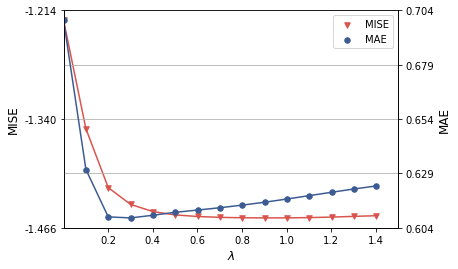

In [15]:
# first line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'MISE')
p1 = ax1.scatter(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = 'MISE')
# second line
ax2 = ax1.twinx()
line2, = ax2.plot(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'MAE')
p2 = ax2.scatter(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = 'MAE')

# axis setting
ax1.set_xlim([range_l,range_u])
interval_l,interval_u=df["L2"].to_numpy().min(),df["L2"].to_numpy().max()
ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=df["mae"].to_numpy().min(),df["mae"].to_numpy().max()
ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

ax1.set_xlabel(r'$\lambda$',fontsize = 12)
ax1.set_ylabel("MISE",fontsize = 12)
ax2.set_ylabel("MAE",fontsize = 12)

ax1.yaxis.set_major_locator(LinearLocator(3)) 
ax2.yaxis.set_major_locator(LinearLocator(5)) 
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
# set legend and grid
plt.legend(handles = [p1,p2])
plt.grid(axis='y')